In [1]:
from torchvision import models
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt
import torch
import cv2
import numpy as np
#from google.colab import files
#uncomment the above line tov use colab's files.upload function

In [2]:
# 读取DeepLabV3模型
dlab = models.segmentation.deeplabv3_resnet101(pretrained=1).eval()

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/hub/checkpoints/resnet101-5d3b4d8f.pth


Downloading: "https://download.pytorch.org/models/deeplabv3_resnet101_coco-586e9e4e.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet101_coco-586e9e4e.pth


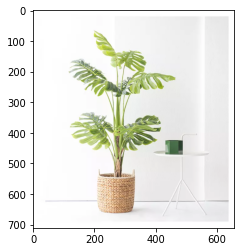

In [3]:
# 读取RGB图像数据
img = Image.open('/content/green.jpg').convert('RGB')
plt.imshow(img)
plt.show()

In [4]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

trf = T.Compose([T.Resize(256),     # 将图像变为256×256大小
                 T.CenterCrop(224), # 将图像从中心剪裁为224×224大小
                 T.ToTensor(),      # 数据转化为Tensor格式
                 T.Normalize(mean = [0.485, 0.456, 0.406], 
                             std = [0.229, 0.224, 0.225])])
                                    # 对图像进行归一化处理 

In [5]:
# 转化为四维数据
inp = trf(img).unsqueeze(0)

In [6]:
out = dlab(inp)['out']
print ("输出数据的维度",out.shape)

输出数据的维度 torch.Size([1, 21, 224, 224])


In [7]:
om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
print("输出图像的大小",om.shape)
print("图像中包含的类别",np.unique(om))

输出图像的大小 (224, 224)
图像中包含的类别 [ 0 16]


In [8]:
label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])

def decode_segmap(image,label_colors, nc=21):
  # 储存不同类别对应的颜色
  
    # 三张灰度图像，储存三通道的像素值
  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)
  
  for l in range(0, nc):
    idx = image == l
    r[idx] = label_colors[l, 0]
    g[idx] = label_colors[l, 1]
    b[idx] = label_colors[l, 2]
    
    # 将三张灰度图像组成RGB图像
  rgb = np.stack([r, g, b], axis=2)
  return rgb

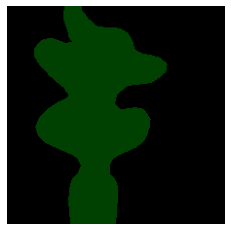

In [9]:
rgb = decode_segmap(om,label_colors)
plt.imshow(rgb); plt.axis('off'); plt.show()

In [10]:
label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 128, 128), (128, 128, 128), (128, 128, 128),(128, 128, 128), (128, 128, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (128, 128, 128), (128, 128, 128), (128, 128, 128),(128, 128, 128), (128, 128, 128),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
              (128, 128, 128), (128, 128, 128), (128, 128, 128), (128, 128, 128), (128, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
              (128, 128, 128), (128, 128, 128), (128, 128, 128), (128, 128, 128), (128, 128, 128)])

def decode_segmap(image,label_colors, nc=21):
  # 储存不同类别对应的颜色
      # 三张灰度图像，储存三通道的像素值
  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)
  
  for l in range(0, nc):
    idx = image == l
    r[idx] = label_colors[l, 0]
    g[idx] = label_colors[l, 1]
    b[idx] = label_colors[l, 2]
    
    # 将三张灰度图像组成RGB图像
  rgb = np.stack([r, g, b], axis=2)
  return rgb

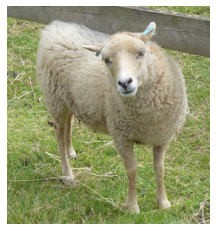

In [11]:
img = Image.open('/content/sheep.jpg').convert('RGB')
plt.imshow(img); plt.axis('off'); plt.show()

In [12]:
# 转化为四维数据
inp = trf(img).unsqueeze(0)
out = dlab(inp)['out']
print ("输出数据的维度",out.shape)
om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
print("输出图像的大小",om.shape)
print("图像中包含的类别",np.unique(om))
rgb = decode_segmap(om,label_colors)

输出数据的维度 torch.Size([1, 21, 224, 224])
输出图像的大小 (224, 224)
图像中包含的类别 [ 0 17]


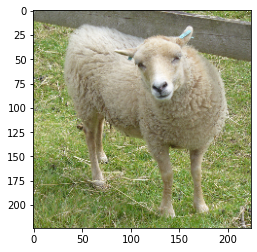

In [13]:
foreground=cv2.imread("/content/sheep.jpg")
  
# The lines of code is used to make some modifications to the image array.
# First the foreground color coding is changed from BGR to RGB just to make sure that we are working with an image in RGB format and then it is resized so that it is of the same shape and size as rgb matrix by using the shape of the r channel in the r variable.
foreground=cv2.cvtColor(foreground,cv2.COLOR_BGR2RGB)
r = np.zeros_like(om).astype(np.uint8)
foreground=cv2.resize(foreground,(r.shape[1],r.shape[0]))
plt.imshow(foreground)

In [14]:
background=255*np.ones_like(rgb).astype(np.uint8)
# Now the foreground and background are converted to float datatype from unit8 as it is better to use float as input to the remaining functions .
foreground=foreground.astype(float)
background=background.astype(float)

阈值th: 0.0


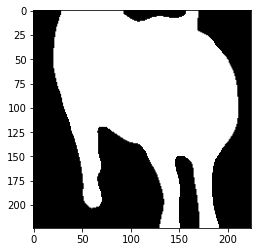

In [15]:
th, alpha = cv2.threshold(np.array(rgb),0,255, cv2.THRESH_BINARY)
print("阈值th:", th)
plt.imshow(alpha)

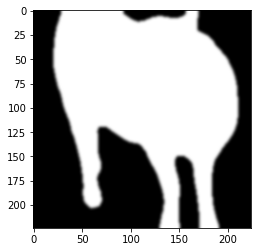

In [16]:
alpha = cv2.GaussianBlur(alpha, (7,7),0)
plt.imshow(alpha)


In [17]:
alpha=alpha.astype(float)/255
foreground=cv2.multiply(1.0-(alpha==0),foreground)
background=cv2.multiply(1.0-alpha,background)
outImage=cv2.add(foreground,background)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


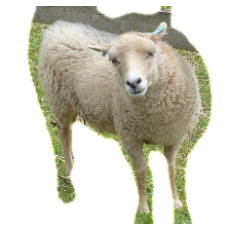

In [18]:
plt.imshow(outImage/255); plt.axis('off'); plt.show()